Accuracy: 1.0
Confusion Matrix:
 [[21  0]
 [ 0 19]]


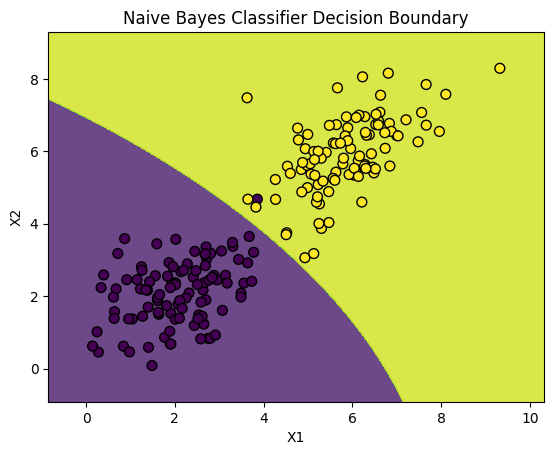

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
data_class_0 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], 100)
data_class_1 = np.random.multivariate_normal([6, 6], [[1, 0.5], [0.5, 1]], 100)
X = np.vstack((data_class_0, data_class_1))
y = np.hstack((np.zeros(100), np.ones(100)))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Decision boundary
h = 0.01
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, h),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)
plt.title('Naive Bayes Classifier Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
X = TfidfVectorizer(stop_words='english').fit_transform(data.data)
wcss = [KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=42).fit(X).inertia_ for k in range(1, 11)]
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=10, random_state=42).fit(X)
labels = kmeans.labels_
for i in range(10):
    print(f"Document {i} -> Cluster {labels[i]}")
print("\nTop terms per cluster:")
terms = TfidfVectorizer(stop_words='english').fit(data.data).get_feature_names_out()
for i, cluster in enumerate(kmeans.cluster_centers_.argsort()[:, ::-1]):
    print(f"\nCluster {i}:")
    print(" ".join(terms[ind] for ind in cluster[:10]))
